In [288]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

In [289]:
df_demandas = pd.read_csv('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Demandas_treinamento/demandas',
                          index_col='date',
                          parse_dates=True)['demandas']

In [290]:
'''
order(
      p = defini a ordem do polinômio autorregressivo,
      d = defini a ordem do operador de diferença simples,
      q = defini a ordem do polinômio média móvel simples
      )
      
seasonal_order(
               P = defini a ordem do polinômio autorregressivo sazonal,
               D = defini a ordem do operador de diferença sazonal,
               Q = defini a ordem do polinômio média móvel sazonal,
               s = é um inteiro que dá a periodicidade (número de períodos na temporada)
               )
'''
#nosso s seria 52

params={
    'freq':'7d',
    #'tren':'ct',
    'order':(0,0,0),
    #'seasonal_order':(0,1,1,52),
    #'order':(5,0,3),
    'seasonal_order':(0,1,1,52),
}

In [291]:
df_train, df_test = df_demandas.iloc[:166],df_demandas.iloc[166:]

In [292]:
model=sm.tsa.statespace.SARIMAX(df_train,**params)
#model=sm.tsa.arima.ARIMA(df_train,**params)
results=model.fit()

C:\Users\marcio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\marcio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [293]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                   demandas   No. Observations:                  166
Model:             SARIMAX(0, 1, [1], 52)   Log Likelihood                -200.575
Date:                    Thu, 29 Jun 2023   AIC                            405.150
Time:                            19:39:42   BIC                            410.622
Sample:                        01-01-2015   HQIC                           407.371
                             - 03-01-2018                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L52      -0.8198      0.756     -1.084      0.278      -2.302       0.662
sigma2         1.3849      0.985      1.405      0.160      -0.547       3.316
===================================================================================
Ljung-Box (L1) (Q):                   0.67   Jarque-Bera (JB):                 0.97
Prob(Q):                              0.41   Prob(JB):                         0.62
Heteroskedasticity (H):               0.76   Skew:                             0.10
Prob(H) (two-sided):                  0.40   Kurtosis:                         2.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [294]:
previsao_test = results.predict(start=len(df_train),end=len(df_train)+len(df_test)-1,dynamic=True)

In [295]:
round(len(previsao_test)/len(df_demandas),4)

0.2057

In [296]:
with open("C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Prev_teste/test_sarima.txt", "w") as arquivo:
    n = len(previsao_test)
    for j in range(n-1):
        arquivo.write(f'{previsao_test.values[j]}, ')
    arquivo.write(f'{previsao_test.values[n-1]}')


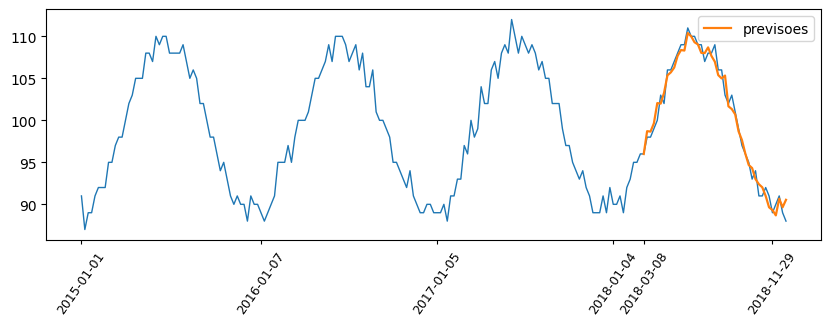

In [297]:
fig=plt.figure(figsize=(10,3))

'''
ax=fig.add_subplot(2,1,1)

plt.scatter(range(len(df_test)),previsao_test,label='previsões',color='black')
plt.plot(range(len(df_test)),df_test,label='demandas reais')
plt.legend()

indice = 0 
for i in range(len(previsao_test)):
    if previsao_test[i] > df_test.iloc[i]:
        plt.vlines(x=i, ymin=df_test.iloc[i], ymax=previsao_test[i],linestyle='--',color='black')
    else:
        plt.vlines(x=i, ymin=previsao_test[i], ymax=df_test.iloc[i],linestyle='--',color='black')
    indice+=1
'''

ax=fig.add_subplot(1,1,1)

plt.plot(df_demandas.index,df_demandas, linewidth=1)
plt.plot(previsao_test.index,previsao_test,label='previsoes', linewidth=1.6)
plt.xticks([df_demandas.index[i] for i in [0,53,105,157,166,204]])
plt.tick_params(axis='x', labelsize=9, length=3)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
plt.legend()


In [298]:
import numpy as np

In [299]:
residuos = np.array(df_test)-np.array(previsao_test)

$e_{i} = y_{i}-\hat{y}_{i}\sim N\left(0,30\right)$

In [300]:
import seaborn as sns

In [301]:
normal = np.random.normal(0, 1,2000000)

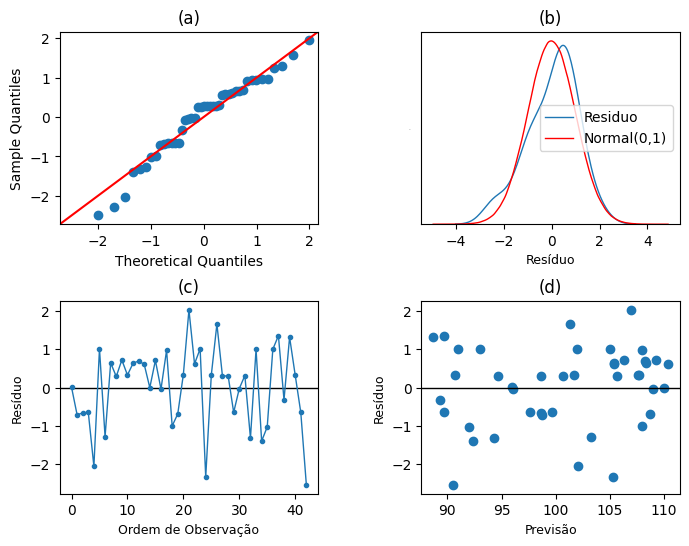

In [302]:
fig=plt.figure(figsize=(8,6))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
titulo = ['(a)','(b)','(c)','(d)']

ax=fig.add_subplot(2,2,3)
ax.set_title(titulo[2])
plt. axhline(y=0,xmin=0,xmax=len(previsao_test),color='black', linewidth=1)
plt.plot(range(len(residuos)),residuos,marker='.', linewidth=1)
plt.ylabel('Resíduo',fontsize=9)
plt.xlabel('Ordem de Observação',fontsize=9)

ax=fig.add_subplot(2,2,2)
ax.set_title(titulo[1])
sns.kdeplot(residuos,label="Residuo", linewidth=1)
sns.kdeplot(normal,label='Normal(0,1)', linewidth=1,color='red')
plt.legend()
#plt.tick_params(axis='y', labelsize=0, length=0)
plt.yticks([])
plt.ylabel([], fontsize=0)
plt.xlabel('Resíduo',fontsize=9)

ax=fig.add_subplot(2,2,1)
ax.set_title(titulo[0])
sm.qqplot(residuos,fit=True,line='45',ax=ax)

ax=fig.add_subplot(2,2,4)
ax.set_title(titulo[3])
plt.scatter(previsao_test,residuos)
plt.axhline(y=0,xmin=0,xmax=len(previsao_test),color='black', linewidth=1)
plt.ylabel('Resíduo',fontsize=9)
plt.xlabel('Previsão',fontsize=9)

plt.savefig('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/img/Sarima_Residuos.png', bbox_inches='tight',pad_inches = 0.1,format='png')
plt.show()

In [303]:
import statsmodels.api as sm

#print('MSE_Teste =',sm.tools.eval_measures.mse(previsoes_test, df_test.y, axis=0))

print('RMSE_Teste =',round(sm.tools.eval_measures.rmse(previsao_test, df_test, axis=0),4))

print('MAE_Teste =',round(sm.tools.eval_measures.meanabs(previsao_test, df_test, axis=0),4))

print(f'MAPE_Teste = {round(100*metrics.mean_absolute_percentage_error(df_test, previsao_test),4)}%')

RMSE_Teste = 1.0286
MAE_Teste = 0.8335
MAPE_Teste = 0.8409%


MAE = $\frac{1}{n}\sum_{i=1}^{n}\mid y_{i}-\hat{y}\mid$ 

RMSE = $\sqrt{\frac{1}{n}\sum_{i=1}^{n}\left(y_{i}-\hat{y}\right)^{2}}$

MAPE = $\frac{1}{n}\sum_{i=1}^{n}\mid \frac{y_{i}-\hat{y}}{y_{i}}\mid$ 

C:\Users\marcio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


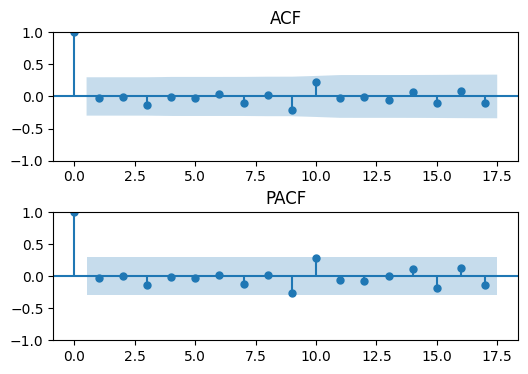

In [304]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig=plt.figure(figsize=(6,4))
plt.subplots_adjust(wspace=0, hspace=0.4)


ax=fig.add_subplot(2,1,1)
plot_acf(residuos,title='ACF',alpha=.05,ax=ax)

ax=fig.add_subplot(2,1,2)
plot_pacf(residuos,title='PACF',ax=ax)

plt.savefig('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/img/Residuo_ACF_PACF_sar.png', bbox_inches='tight',pad_inches = 0.1,format='png')

plt.show()

# Fase de Previsão

In [305]:
qtd_previsoes = 17

In [ ]:
'''
for i in range(60):
        
    model = sm.tsa.arima.ARIMA(df_demandas,**params)
    results = model.fit()
    previsao = results.predict(start=len(df_demandas),end=len(df_demandas)+qtd_previsoes-1,dynamic=True)
    with open(f"C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Previsoes/Prev_sar/Previsao_sar{i}.txt", "w") as arquivo:
        n = len(previsao)
        for j in range(n-1):
            arquivo.write(f'{previsao[j]}, ')
        arquivo.write(f'{previsao[n-1]}')
'''
